In [60]:
# importing dependencies

import pandas as pd
import datetime as dt
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [61]:
# reading CSV data

df = pd.read_csv('C:/Users/sweir/OneDrive/Desktop/Analysis Projects/Crude_Oil_Price_Projection/Resources/clean_datasets/Cleaned_Crude_Oil_Dataset.csv')
df.head()

,Date,U.S. Field Production of Crude Oil (1k Bar.),Gross Inputs to Refineries (1k Bar./Day),Operable Crude Oil Distillation Capacity (1k Bar./Calendar Day),Operating Crude Oil Distillation Capacity (1k Bar./Day),Idle Crude Oil Distillation Capacity (1k Bar./Day),Percent Utilization of Refinery Operable Capacity,"Cushing, OK Crude Oil Future Contract 1 ($/Bar.)","Cushing, OK Crude Oil Future Contract 2 ($/Bar.)","Cushing, OK Crude Oil Future Contract 3 ($/Bar.)","Cushing, OK Crude Oil Future Contract 4 ($/Bar.)","Cushing, OK WTI Spot Price FOB ($/Bar.)"
0,Jan-1986,283248,12583,15459,14639,820,81.4,23.0,22.4,21.9,21.7,22.9
1,Feb-1986,256855,12068,15485,14538,947,77.9,15.5,15.7,15.8,15.9,15.5
2,Mar-1986,279413,11759,15485,14517,968,75.9,12.6,13.0,13.1,13.3,12.6
3,Apr-1986,265917,12603,15473,14550,923,81.5,12.8,12.6,12.6,12.6,12.8
4,May-1986,273964,13314,15484,14805,679,86.0,15.3,14.8,14.4,14.3,15.4


In [62]:
df.dtypes

Date                                                                object
U.S. Field Production of Crude Oil (1k Bar.)                         int64
Gross Inputs to Refineries (1k Bar./Day)                             int64
Operable Crude Oil Distillation Capacity (1k Bar./Calendar Day)      int64
Operating Crude Oil Distillation Capacity (1k Bar./Day)              int64
Idle Crude Oil Distillation Capacity (1k Bar./Day)                   int64
Percent Utilization of Refinery Operable Capacity                  float64
Cushing, OK Crude Oil Future Contract 1 ($/Bar.)                   float64
Cushing, OK Crude Oil Future Contract 2 ($/Bar.)                   float64
Cushing, OK Crude Oil Future Contract 3 ($/Bar.)                   float64
Cushing, OK Crude Oil Future Contract 4 ($/Bar.)                   float64
Cushing, OK WTI Spot Price FOB ($/Bar.)                            float64
dtype: object

In [63]:
# to convert the date column to type DATETIME
df['Date'] = pd.to_datetime(df['Date'])

In [64]:
# reformatting columns

df = df.rename(columns={'Cushing, OK Crude Oil Future Contract 1 ($/Bar.)': 'FuturesPrice1', 'Cushing, OK Crude Oil Future Contract 2 ($/Bar.)': 'FuturesPrice2', 'Cushing, OK Crude Oil Future Contract 3 ($/Bar.)': 'FuturesPrice3', 'Cushing, OK Crude Oil Future Contract 4 ($/Bar.)': 'FuturesPrice4'})
df.head()

,Date,U.S. Field Production of Crude Oil (1k Bar.),Gross Inputs to Refineries (1k Bar./Day),Operable Crude Oil Distillation Capacity (1k Bar./Calendar Day),Operating Crude Oil Distillation Capacity (1k Bar./Day),Idle Crude Oil Distillation Capacity (1k Bar./Day),Percent Utilization of Refinery Operable Capacity,FuturesPrice1,FuturesPrice2,FuturesPrice3,FuturesPrice4,"Cushing, OK WTI Spot Price FOB ($/Bar.)"
0,1986-01-01,283248,12583,15459,14639,820,81.4,23.0,22.4,21.9,21.7,22.9
1,1986-02-01,256855,12068,15485,14538,947,77.9,15.5,15.7,15.8,15.9,15.5
2,1986-03-01,279413,11759,15485,14517,968,75.9,12.6,13.0,13.1,13.3,12.6
3,1986-04-01,265917,12603,15473,14550,923,81.5,12.8,12.6,12.6,12.6,12.8
4,1986-05-01,273964,13314,15484,14805,679,86.0,15.3,14.8,14.4,14.3,15.4


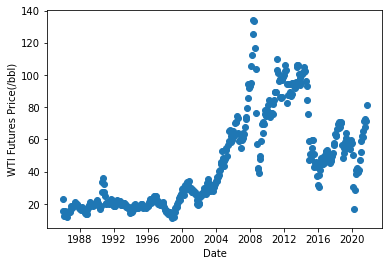

In [65]:
# initial visualization of Futures Price Data

plt.scatter(df.Date, df.FuturesPrice1)
plt.xlabel('Date')
plt.ylabel('WTI Futures Price(/bbl)')
plt.show()

In [67]:
# creating new dataframe with ONLY Date and Futures Pricing Data
futures_prices_df = df[['Date', 'FuturesPrice1']]
futures_prices_df.head()

,Date,FuturesPrice1
0,1986-01-01,23.0
1,1986-02-01,15.5
2,1986-03-01,12.6
3,1986-04-01,12.8
4,1986-05-01,15.3


In [68]:
 # setting the index for new DataFrame
futures_prices_df.set_index('Date')

,FuturesPrice1
Date,
1986-01-01,23.0
1986-02-01,15.5
1986-03-01,12.6
1986-04-01,12.8
1986-05-01,15.3
...,...
2021-06-01,71.4
2021-07-01,72.4
2021-08-01,67.7


In [71]:
# feature engineering- adding a month delta column as a predictor
futures_prices_df['months_from_start'] = (futures_prices_df.index - futures_prices_df.index[0]); futures_prices_df

C:\Users\sweir\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,FuturesPrice1,months_from_start
0,1986-01-01,23.0,0
1,1986-02-01,15.5,1
2,1986-03-01,12.6,2
3,1986-04-01,12.8,3
4,1986-05-01,15.3,4
...,...,...,...
425,2021-06-01,71.4,425
426,2021-07-01,72.4,426
427,2021-08-01,67.7,427
428,2021-09-01,71.5,428


In [73]:
# defining x and y vraiables for the regression model
x = futures_prices_df['months_from_start'].values.reshape(-1, 1)
y = futures_prices_df['FuturesPrice1'].values

In [74]:
# model object creation and training  
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [76]:
# prediction generation
y_pred = model.predict(x)
print(y_pred.shape)

(430,)


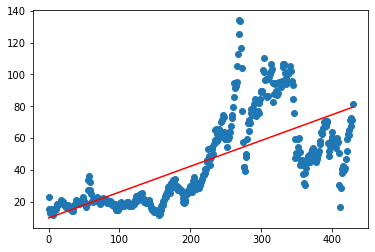

[0.16230698]
9.757245993632985


In [78]:
# model output visualization
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()
print(model.coef_)
print(model.intercept_)